In [1]:
import json
import math
import matplotlib.pyplot as plt
import numpy as np

# Opening JSON file with QR uncert.
f = open('/eos/project/d/dshep/TOPCLASS/DijetAnomaly/QR_models/envelope/cut_stats.json',)
qr_unc = json.load(f)
for i in qr_unc['q90']:
    print("{} {} {} {}".format(i[0],i[1],math.fabs(i[1]-i[4]),math.fabs(i[4]-i[1])))
f.close()

1227.5 1.58446447849 0.000183534622192 0.000183534622192
1287.5 1.61229701042 0.000362801551819 0.000362801551819
1353.5 1.64329664707 0.000355315208435 0.000355315208435
1422.0 1.6753721714 0.000889253616333 0.000889253616333
1493.0 1.70715918541 0.00107393264771 0.00107393264771
1566.5 1.74193828106 0.000191164016724 0.000191164016724
1642.5 1.77669539452 0.000341272354126 0.000341272354126
1721.0 1.81296391487 0.00105409622192 0.00105409622192
1802.5 1.85181369781 0.000701880455017 0.000701880455017
1887.0 1.89293189049 0.000724363327026 0.000724363327026
1974.5 1.93660261631 0.00123558044434 0.00123558044434
2065.0 1.98340940475 0.00114071369171 0.00114071369171
2158.5 2.03373680115 0.00103344917297 0.00103344917297
2255.5 2.08805375099 0.000626039505005 0.000626039505005
2355.5 2.14667158127 0.00124592781067 0.00124592781067
2459.0 2.21047401428 0.00134038925171 0.00134038925171
2566.0 2.27926044464 0.00164909362793 0.00164909362793
2676.5 2.35361657143 0.0022584438324 0.002258443

q01
np.poly1d([-7.03032980e-11  1.06542864e-06 -2.17139299e-03  3.31447885e+00])


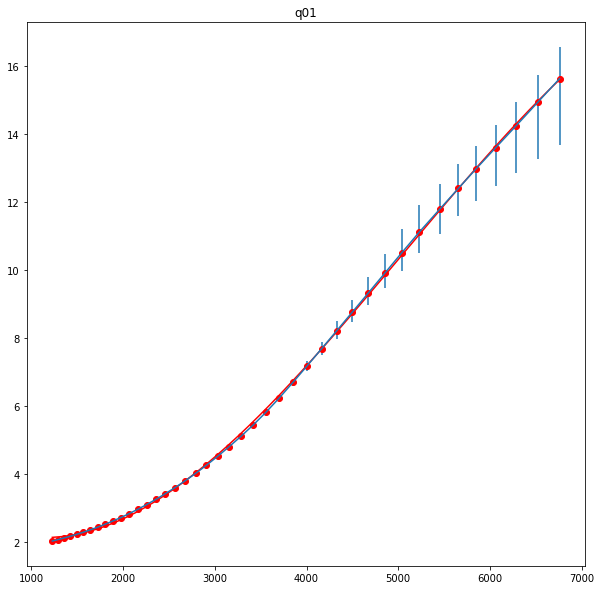

q10
np.poly1d([-4.60568395e-11  7.63471757e-07 -1.55537204e-03  2.81116723e+00])


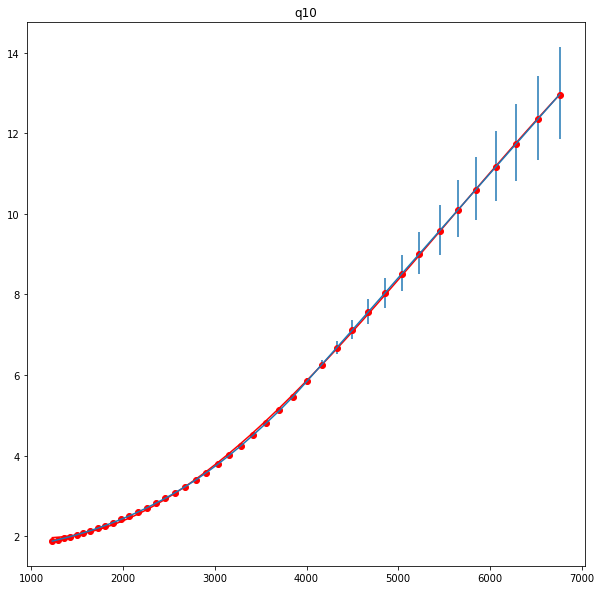

q90
np.poly1d([-1.57031061e-11  3.01628110e-07 -5.03564141e-04  1.83966064e+00])


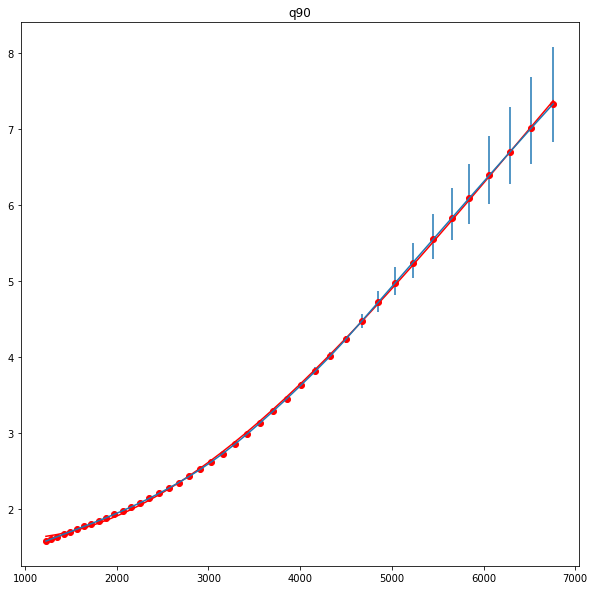

In [5]:
qrs = ['01','10','90']
for qr in qrs:
    qstring = 'q{}'.format(qr)
    x      = np.array([i[0] for i in qr_unc[qstring]])
    y      = np.array([i[1] for i in qr_unc[qstring]])
    y_down = np.fabs(y-np.array([i[3] for i in qr_unc[qstring]]))
    y_up   = np.fabs(y-np.array([i[4] for i in qr_unc[qstring]]))


    xp = np.linspace(x[0], x[-1])

    fig, ax1 = plt.subplots(figsize=(10,10))

    asymmetric_error = [y_down, y_up]

    ax1.errorbar(x, y, yerr=asymmetric_error, fmt='-')
    ax1.set_title(qstring)
    # ax1.set_yscale('log')
    coefficients = np.polyfit(x, y, 3)
    print(qstring)
    print("np.poly1d({})".format(coefficients))
    poly = np.poly1d(coefficients)
    new_y = poly(xp)
    plt.plot(x, y, "o", xp, new_y,color="red")
    plt.show()
